In [2]:
from arcgis.gis import GIS

gis = GIS()

In [3]:
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor
sdf = pd.DataFrame.spatial.from_featureclass(r"C:\Users\George\courses\qmsa\data\bookData\Chapter1\Obesity_Levels_for_States_of_the_United_States\dtl_st.shp")
sdf

C:\Users\George\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\IPython\lib\pretty.py:399: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  return _repr_pprint(obj, self, cycle)
C:\Users\George\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\pandas\io\formats\html.py:606: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  super().render()


,FID,AREA,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,Obesity,Vacancy,SHAPE
0,0,51656.204,Alabama,01,E S Cen,AL,31.000000,0,"{""rings"": [[[-87.539128, 30.280996], [-87.5421..."
1,1,577756.887,Alaska,02,Pacific,AK,24.799999,0,"{""rings"": [[[-157.85292, 67.072433], [-157.857..."
2,2,113995.679,Arizona,04,Mtn,AZ,25.500000,0,"{""rings"": [[[-111.365919, 31.425982], [-111.36..."
3,3,53178.219,Arkansas,05,W S Cen,AR,30.500000,0,"{""rings"": [[[-94.44755554199219, 34.9338378906..."
4,4,158080.902,California,06,Pacific,CA,24.799999,0,"{""rings"": [[[-119.370947, 34.011902], [-119.37..."
5,5,104091.687,Colorado,08,Mtn,CO,18.600000,0,"{""rings"": [[[-102.2086181640625, 41.0024490356..."
6,6,4965.559,Connecticut,09,N Eng,CT,20.600000,0,"{""rings"": [[[-72.90445, 41.272559], [-72.90471..."
7,7,1984.514,Delaware,10,S Atl,DE,27.000000,0,"{""rings"": [[[-75.50192124956926, 39.6991305674..."
8,8,68.342,District of Columbia,11,S Atl,DC,19.700001,0,"{""rings"": [[[-77.00859832763672, 38.9700012207..."
9,9,56724.942,Florida,12,S Atl,FL,25.200001,0,"{""rings"": [[[-85.746289, 30.167773], [-85.7465..."


In [4]:
mnb = gis.map()

sdf.spatial.plot(
               map_widget= mnb,
               renderer_type='c',  # for class breaks renderer
               method='esriClassifyEqualInterval',  # classification algorithm
               class_count=20,  # choose the number of classes
               col='Obesity',  # numeric column to classify
               cmap='hot',  # color map to pick colors from for each class
               alpha=0.7  # specify opacity
               )
#Colormaps can be found here: https://matplotlib.org/gallery/color/colormap_reference.html

mnb

MapView(layout=Layout(height='400px', width='100%'))

In [50]:
grouped = sdf.groupby(['SUB_REGION']).mean()
df = grouped.reset_index()
df

,SUB_REGION,FID,AREA,Obesity,Vacancy
0,E N Cen,26.600000,49626.371200,28.620000,0.0
1,E S Cen,20.750000,45469.925000,32.300000,0.0
2,Mid Atl,33.333333,33835.937667,24.966667,0.0
3,Mtn,24.750000,107942.347125,23.850000,0.0
4,N Eng,26.500000,10905.165000,23.483333,0.0
5,Pacific,20.000000,181365.936200,24.259999,0.0
6,S Atl,24.555556,30264.781667,26.677778,0.0
7,W N Cen,25.857143,73970.112429,27.900000,0.0
8,W S Cen,25.000000,108664.991250,30.900000,0.0


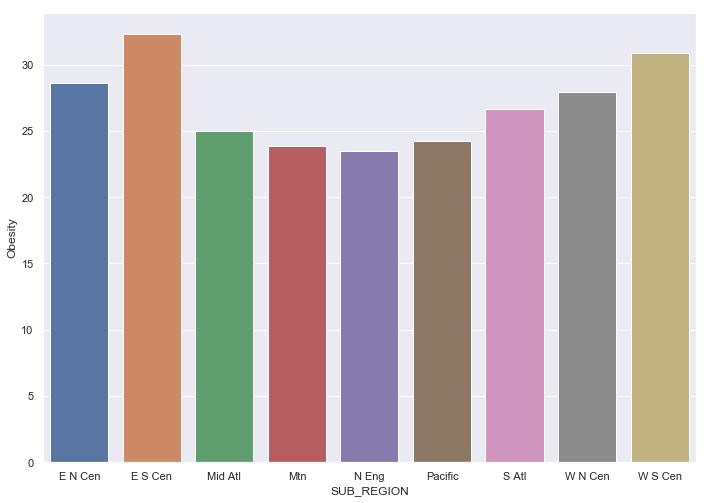

In [52]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x=df["SUB_REGION"], y=df["Obesity"])